# PA005: High Value Customer Identification ( Insiders )

## Ciclo 00 Planejamento da Solução( IOT )

### Input - Entrada

1. Problema de Negócio
- Selecionar os clientes mais valiosos para integrar um programa de Fidelização. 

2. Conjunto de Dados
- Vendas de um e-commerce online, durante o período de um ano. 

### Outpout - Saída

1. indicação das pessoas que farão parte do programa de Insiders 
- Lista: client_id|is_insider|
    
            10323 | yes/1
            32413 | no/1
            
2. Relatório com as respostas das perguntas de negócio.

- Quem são as pessoas elegíveis para participar do programa de
Insiders ?
- Quantos clientes farão parte do grupo?
- Quais as principais características desses clientes ?
- Qual a porcentagem de contribuição do faturamento, vinda do
Insiders ?
- Qual a expectativa de faturamento desse grupo para os próximos
meses ?
- Quais as condições para uma pessoa ser elegível ao Insiders ?
- Quais as condições para uma pessoa ser removida do Insiders ?
- Qual a garantia que o programa Insiders é melhor que o restante da
base ?
- Quais ações o time de marketing pode realizar para aumentar o
faturamento?

### Tasks - Tarefas

1. Quem são as pessoas elegíveis para participar do programa de
Insiders ?
    - O que é ser elegível ?  O que são clientes de maior "valor"
    - Faturamento: 
        - Alto Ticket médio.
        - Alto LTV(receita média por cliente durante o relacionamento com a empresa.)
        - Baixa Recência(tempo desde a ultima compra)
        - Alto bascket size( Tamanho da sexta de compra)
        - Baixa probabilidade de churn(Cliente para de comprar).
        
        
    - Custo:
        - Baixa Taxa de devolução. 
               
        
    - Experiência de Compra:
        - Média alta das avaliação.         
        

2. Quantos clientes farão parte do grupo?
    - Número total de clientes.
    - % do grupo Insiders
    
3. Quais as principais características desses clientes ?
    - Escrever características do cliente:
        - Idade
        - Localização. 

    - Escrever características do consumo.
        - Atributos da clusterização. 
        
4. Qual a porcentagem de contribuição do faturamento, vinda do Insiders ?
         - Faturamento total do ano.
         - Faturamento do grupo de Insiders
         
5. Qual a expectativa de faturamento desse grupo para os próximos meses ?
        - LTV do grupo Insiders
        - Análise de cohort()

6. Quais as condições para uma pessoa ser elegível ao Insiders ?
        - Definir a periodicidade( 1 mês, 3 mêses )
        - A pessoa precisa ser similar ou parecido com uma pessoa grupo. 
               
7. Quais as condições para uma pessoa ser removida do Insiders ?
        - Definir a periodicidade( 1 mês, 3 mêses )
        - A pessoa precisa ser desimilar ou não-parecido com uma pessoa grupo. 
        
8. Qual a garantia que o programa Insiders é melhor que o restante da base ?
    - Teste A/B
    - Teste A/B Baysiano
    - Teste de hipótese

9. Quais ações o time de marketing pode realizar para aumentar o faturamento?
    - Desconto
    - Preferencia de compra
    - Frente 
    - Visita a empresa

## Ciclo 01 - Métricas de Validação de Cluster

1. Feature Engineering
- Recências
- Frequência
- Monetização

2. Métricas de Validação de Clustering
- wss( Within-CLuster Sum of Square)
- SS( Silhouette Score)

3. Cluster Analysis
- Plot 3D
- Cluster Profile

## Ciclo 02 - Métricas de Validação de Cluster

1. Feature Engineering
- Avarage Ticket

2. Análise de Silhouette
- Silhouette Analysis

3. Cluster Visualization
- UMAP

4. Cluster Análise de Perfil
- Descrição dos centróides dos cluster


## Ciclo 03 - Métricas de Validação de Cluster

1. Análise Descritiva
- Atributos numéricos
- Atributos categóricos

2. Feature Engineering
- Avarage Recebcy
- Number of Returns

3. Data preparation
- Standard Scaler


# 0.0 Imports

## 0.1. Libries

In [77]:
import pandas     as pd
import numpy      as np
import seaborn    as sns

import umap.umap_ as umap

import regex      as re

from matplotlib              import pyplot        as plt

from sklearn                 import cluster       as c
from sklearn                 import preprocessing as pp
from sklearn                 import decomposition as dd
from sklearn.cluster         import KMeans
from yellowbrick.cluster     import KElbowVisualizer, SilhouetteVisualizer
from sklearn                 import metrics       as m
from sklearn.manifold        import TSNE
from sklearn                 import ensemble      as en
from sklearn                 import manifold      as mn
from sklearn                 import mixture       as mx
from sklearn.neighbors       import NearestNeighbors 

from scipy.cluster.hierarchy import linkage 
from scipy.cluster           import hierarchy     as hc

from PIL                     import Image

#from plotly              import express as px

#from pandas_profiling    import ProfileReport



import warnings
warnings.filterwarnings('ignore')



## 0.2. Helper Function

## 0.3. Load Dataset

In [2]:
#Load data
df_raw = pd.read_csv('data/Ecommerce.csv', sep=',', encoding = "ISO-8859-1")

#Drop extra column
df_raw = df_raw.drop( columns = ['Unnamed: 8'], axis = 1 )

In [3]:
df_raw.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,29-Nov-16,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,29-Nov-16,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,29-Nov-16,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,29-Nov-16,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,29-Nov-16,3.39,17850.0,United Kingdom


# 1.0. Descrição dos Dados

In [4]:
df1 = df_raw.copy()

## 1.1 Rename Columuns

In [5]:
df1.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [6]:
cols_new= ['invoice_no', 'stock_code', 'description', 'quantity', 'invoice_date', 'unit_price', 'customer_id', 'country']
df1.columns = cols_new
df1.columns

Index(['invoice_no', 'stock_code', 'description', 'quantity', 'invoice_date',
       'unit_price', 'customer_id', 'country'],
      dtype='object')

## 1.2. Data Dimensions

In [7]:
print( 'Number of Rows: {}'.format( df1.shape[0] ) )
print( 'Number of cols: {}'.format( df1.shape[1] ) )

Number of Rows: 541909
Number of cols: 8


## 1.3. Data Types

In [8]:
df1.dtypes

invoice_no       object
stock_code       object
description      object
quantity          int64
invoice_date     object
unit_price      float64
customer_id     float64
country          object
dtype: object

## 1.4. Check NA

In [9]:
df1.isna().sum()

invoice_no           0
stock_code           0
description       1454
quantity             0
invoice_date         0
unit_price           0
customer_id     135080
country              0
dtype: int64

## 1.5 Replace NA

In [10]:
#separar um dataframe só com os dados que tem customer_id NaN(df_missing)
df_missing = df1.loc[df1['customer_id'].isna(), :]

#separar um dataframe só com os dados que tem customer_id sem Nan
df_not_missing = df1.loc[~df1['customer_id'].isna(), :]

In [11]:
#create reference
df_backup = pd.DataFrame( df_missing['invoice_no'].drop_duplicates() )
df_backup['customer_id'] = np.arange(19000, 19000+len( df_backup ), 1 )

#merge original with reference dataframe
df1 = pd.merge( df1, df_backup, on = 'invoice_no', how = 'left' )

#coalesce
df1['customer_id'] = df1['customer_id_x'].combine_first( df1['customer_id_y'])

#drop extra columns
df1 = df1.drop( columns = ['customer_id_x', 'customer_id_y'], axis = 1)

In [12]:
df1.isna().sum()

invoice_no         0
stock_code         0
description     1454
quantity           0
invoice_date       0
unit_price         0
country            0
customer_id        0
dtype: int64

## 1.6 Change Types

In [13]:
#invoice date
df1['invoice_date'] = pd.to_datetime( df1['invoice_date'], format = '%d-%b-%y')

#customer id
df1['customer_id'] = df1['customer_id'].astype( int )
df1.head(1)

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,country,customer_id
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2016-11-29,2.55,United Kingdom,17850


In [14]:
df1.dtypes

invoice_no              object
stock_code              object
description             object
quantity                 int64
invoice_date    datetime64[ns]
unit_price             float64
country                 object
customer_id              int64
dtype: object

## 1.7. Desctiptive Statistical

In [15]:
num_attributes = df1.select_dtypes( include = ['int64', 'float64'] )
cat_attributes = df1.select_dtypes( exclude = ['int64', 'float64', 'datetime64[ns]'])

### 1.7.1 Numerical Atributes

In [16]:
#Central tendency - mean, median
ct1 = pd.DataFrame( num_attributes.apply( np.mean ) ).T
ct2 = pd.DataFrame( num_attributes.apply( np.median ) ).T

#Dispersion - std, min, max, range, skew, kurtosis 
d1 = pd.DataFrame( num_attributes.apply( np.std) ).T
d2 = pd.DataFrame( num_attributes.apply( min ) ).T
d3 = pd.DataFrame( num_attributes.apply( max ) ).T
d4 = pd.DataFrame( num_attributes.apply( lambda x: x.max() - x.min() ) ).T
d5 = pd.DataFrame( num_attributes.apply( lambda x: x.skew() ) ).T
d6 = pd.DataFrame( num_attributes.apply( lambda x: x.kurtosis() ) ).T

# concatenate
m = pd.concat( [d2, d3, d4, ct1, ct2, d1, d5, d6]).T.reset_index()
m.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,quantity,-80995.00,80995.0,161990.00,9.552250,3.00,218.080957,-0.264076,119769.160031
1,unit_price,-11062.06,38970.0,50032.06,4.611114,2.08,96.759764,186.506972,59005.719097
2,customer_id,12346.00,22709.0,10363.00,16688.840453,16249.00,2911.408666,0.487449,-0.804287


#### 1.7.1.1 Numerical Atributs - Investigating

1. Quantidade negativa( pode ser devolução )
2. Preço unitário igual a zero(pode ser promoção? )


### 1.7.2 Categorical Atributes

In [17]:
cat_attributes.head()

,invoice_no,stock_code,description,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
1,536365,71053,WHITE METAL LANTERN,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,United Kingdom


### invoice_no

In [18]:
#Indentificamos que possui letras em colunos de id e codigo, vamos identificar a quantidade
#cat_attributes['invoice_no'].astype( int )
#Indentificamos que possui invoice_no com letras, precisamos saber quantos são para avaliar se é padrão ou sujeira
#len(cat_attributes.loc[cat_attributes['invoice_no'].apply( lambda x: bool (re.search('[^0-9]+', x ))), 'invoice_no'].drop_duplicates())
df_letter_invoices = df1.loc[df1['invoice_no'].apply( lambda x: bool (re.search('[^0-9]+', x ))),:]
#checar se todos os invoice_no com letras possuiem quantity negativa
print( 'Total number of invoices: {}'.format( len( df_letter_invoices ) ) )
print( 'Total number of negative quantity: {}'.format( len( df_letter_invoices[ df_letter_invoices['quantity'] < 0 ] ) ) )

Total number of invoices: 9291
Total number of negative quantity: 9288


### stock_code

In [19]:
#stock code
#selecionar apenas o stock_code com letras e sem número. 
df1.loc[cat_attributes['stock_code'].apply( lambda x: bool( re.search('^[a-zA-Z]+$', x))), 'stock_code'].unique()

#Ação
##1. Remove stock_code in ['POST', 'D', 'DOT', 'M', 'S', 'AMAZONFEE', 'm', 'DCGSSBOY',
#       'DCGSSGIRL', 'PADS', 'B', 'CRUK']


array(['POST', 'D', 'DOT', 'M', 'S', 'AMAZONFEE', 'm', 'DCGSSBOY',
       'DCGSSGIRL', 'PADS', 'B', 'CRUK'], dtype=object)

### description

In [20]:
df1.head()

#Ação: Delete Description

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,country,customer_id
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2016-11-29,2.55,United Kingdom,17850
1,536365,71053,WHITE METAL LANTERN,6,2016-11-29,3.39,United Kingdom,17850
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2016-11-29,2.75,United Kingdom,17850
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2016-11-29,3.39,United Kingdom,17850
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2016-11-29,3.39,United Kingdom,17850


### country

In [21]:
df1['country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [22]:
df1[['country']].value_counts(normalize=True)

country             
United Kingdom          0.914320
Germany                 0.017521
France                  0.015790
EIRE                    0.015124
Spain                   0.004674
Netherlands             0.004375
Belgium                 0.003818
Switzerland             0.003694
Portugal                0.002803
Australia               0.002323
Norway                  0.002004
Italy                   0.001482
Channel Islands         0.001399
Finland                 0.001283
Cyprus                  0.001148
Sweden                  0.000853
Unspecified             0.000823
Austria                 0.000740
Denmark                 0.000718
Japan                   0.000661
Poland                  0.000629
Israel                  0.000548
USA                     0.000537
Hong Kong               0.000531
Singapore               0.000423
Iceland                 0.000336
Canada                  0.000279
Greece                  0.000269
Malta                   0.000234
United Arab Emirates  

In [23]:
df1[['customer_id', 'country']].drop_duplicates().groupby( 'country' ).count().sort_values('customer_id', ascending = False ).reset_index().head() 


,country,customer_id
0,United Kingdom,7587
1,Germany,95
2,France,90
3,EIRE,44
4,Spain,31


> Ao analisar os categoricals atributes, conseguimos perceber que alguns dados estão com informações que não se sabe o significado.

> No caso da invoice_no, percebe-se que todos os dados que possuem alguma letra nesta coluna, possuem quantity negativa, assim sera removido todos estes. 

> A variável description não indicar nada para nosso modelo, então iremos remover esta feature. 

# 2.0. Data Filtering

In [24]:
df2 = df1.copy()

In [25]:
# =========Numerical Attributes==============

#unity_price
#vamos considerar os preços acima de 0.04, a baixo é pouco relevante. 
df2 = df2.loc[df2['unit_price'] >= 0.04, : ]

# =========categorical Attributes==============
#stock_code : remover todos os stock_code sem números
df2 = df2[~df2['stock_code'].isin( ['POST', 'D', 'DOT', 'M', 'S', 'AMAZONFEE', 'm', 'DCGSSBOY','DCGSSGIRL', 'PADS', 'B', 'CRUK'] ) ] 

# description
df2 = df2.drop( columns='description', axis=1 )

#contry: removeremos o European communnity  e mudaremos alguns nomes, para podermos usar uma tabela de zip code encodar.
df2 = df2[~df2['country'].isin(['European Community', 'Unspecified'])]


# bad users
df2 = df2[~df2['customer_id'].isin( [16446] )]

#quantity : Iremos separar em dois df, um com os quantitties negativos e outro com os quantitys positivos. 
df2_returns = df2.loc[df1['quantity'] < 0, :]
df2_purchases = df2.loc[df1['quantity'] >= 0, : ]

In [26]:
df1[['customer_id', 'description', 'unit_price']].sort_values('unit_price', ascending = True ).head(10)

,customer_id,description,unit_price
299984,21499,Adjust bad debt,-11062.06
299983,21498,Adjust bad debt,-11062.06
40984,19296,TRAVEL SEWING KIT,0.00
52217,19385,NaN,0.00
52262,19386,NaN,0.00
344867,21735,Damaged,0.00
204945,20760,NaN,0.00
104419,19743,PORCELAIN BUTTERFLY OIL BURNER,0.00
104418,19743,BLUE POLKADOT PASSPORT COVER,0.00
115488,19819,Thrown away.,0.00


# 3.0. Feature Engeneering

In [28]:
df3 = df2.copy()

## 3.1. Feature Creation

In [29]:
#data reference
df_ref = df3.drop(['invoice_no', 'stock_code','quantity','unit_price','invoice_date','country'], axis = 1).drop_duplicates(ignore_index = True )


### 3.1.1 Gross Revenue

In [30]:
# Gross Revenue ( Faturamento ) quanty * price 
df2_purchases.loc[:, 'gross_revenue'] = df2_purchases.loc[:,  'quantity' ] * df2_purchases.loc[:, 'unit_price' ]

# Monetary 
df_monetary = df2_purchases.loc[:, ['customer_id', 'gross_revenue']].groupby( 'customer_id').sum().reset_index()
df_ref = pd.merge( df_ref, df_monetary, on = 'customer_id', how= 'left')
df_ref.isna().sum()

customer_id       0
gross_revenue    91
dtype: int64

### 3.1.2 Recency - Day from last puschase

In [31]:
# Recency - Last day purchase
df_recency = df2_purchases.loc[:,['customer_id', 'invoice_date']].groupby( 'customer_id').max().reset_index()
df_recency['recency_days'] = (df2_purchases['invoice_date'].max() - df_recency['invoice_date'] ).dt.days
df_recency = df_recency[['customer_id', 'recency_days']].copy()
df_ref = pd.merge(df_ref, df_recency, on = 'customer_id', how = 'left' )
df_ref.isna().sum()

customer_id       0
gross_revenue    91
recency_days     91
dtype: int64

### 3.1.3 Quantity of purchased
quantas vezes o consumidor foi e comprou

In [32]:
#Numero de produtos
df_freq = df2_purchases.loc[:, ['customer_id', 'invoice_no']].drop_duplicates().groupby( 'customer_id').count().reset_index().rename( columns = {'invoice_no': 'qtde_invoices'})
df_ref = pd.merge(df_ref, df_freq, on = 'customer_id', how = 'left' )
df_ref.isna().sum()

customer_id       0
gross_revenue    91
recency_days     91
qtde_invoices    91
dtype: int64

### 3.1.4 Quantity of items purchased
Quantidade de produtos na cesta

In [33]:
#Numero de produtos
df_freq = df2_purchases.loc[:, ['customer_id', 'quantity']].groupby( 'customer_id').sum().reset_index().rename(columns = {'quantity': 'qtde_items'})
df_ref = pd.merge(df_ref, df_freq, on = 'customer_id', how = 'left' )
df_ref.isna().sum()

customer_id       0
gross_revenue    91
recency_days     91
qtde_invoices    91
qtde_items       91
dtype: int64

### 3.1.5 Quantity of products purchased

In [34]:
#Numero de produtos
df_freq = df2_purchases.loc[:, ['customer_id', 'stock_code']].groupby( 'customer_id').count().reset_index().rename(columns = {'stock_code': 'qtde_products'})
df_ref = pd.merge(df_ref, df_freq, on = 'customer_id', how = 'left' )
df_ref.isna().sum()

customer_id       0
gross_revenue    91
recency_days     91
qtde_invoices    91
qtde_items       91
qtde_products    91
dtype: int64

### 3.1.6 Avarenge Ticket Value

In [35]:
#Avg Ticket
df_avg_ticket = df2_purchases.loc[:, ['customer_id', 'gross_revenue']].groupby( 'customer_id' ).mean().reset_index().rename( columns = {'gross_revenue' : 'avg_ticket'})
df_ref = pd.merge( df_ref, df_avg_ticket, on='customer_id', how = 'left')
df_ref.isna().sum()

customer_id       0
gross_revenue    91
recency_days     91
qtde_invoices    91
qtde_items       91
qtde_products    91
avg_ticket       91
dtype: int64

### 3.1.7 Avarenge Recency Days
media de preço entre as compras

In [36]:
#Avarage recency days
df_aux = df3[['customer_id', 'invoice_date']].drop_duplicates().sort_values( ['customer_id', 'invoice_date'], ascending=[False, False ])
df_aux['next_customer_id'] = df_aux['customer_id'].shift() #next customer
df_aux['previous_date'] = df_aux['invoice_date'].shift()# previous invoince date

df_aux['avg_recency_days'] = df_aux.apply( lambda x: (x['previous_date'] - x['invoice_date']).days if x['customer_id'] == x['next_customer_id'] else np.nan, axis = 1)
df_aux = df_aux.drop( [ 'invoice_date', 'next_customer_id', 'previous_date'], axis = 1).dropna()

#avarage recency
df_avg_recency_days = df_aux.groupby('customer_id').mean().reset_index()

#merge
df_ref = pd.merge( df_ref, df_avg_recency_days, on= 'customer_id', how='left' )

df_ref.isna().sum()

customer_id            0
gross_revenue         91
recency_days          91
qtde_invoices         91
qtde_items            91
qtde_products         91
avg_ticket            91
avg_recency_days    2816
dtype: int64

### 3.1.7 Frequency Purchase

In [37]:
df_aux = (df2_purchases[['customer_id','invoice_no', 'invoice_date']].drop_duplicates()
                                                           .groupby( 'customer_id' )
                                                           .agg( max_  = ('invoice_date', 'max'),
                                                                 min_  = ('invoice_date', 'min'),
                                                                 days_ = ('invoice_date', lambda x: (x.max() - x.min()).days + 1),
                                                                 buy_  = ('invoice_no', 'count'))).reset_index()

#Frequency
df_aux['frequency'] = df_aux[['buy_', 'days_']].apply( lambda x: x['buy_'] / x['days_'] if x['days_']!= 0 else 0, axis = 1 )

#Merge
df_ref = pd.merge( df_ref, df_aux[['customer_id', 'frequency']], on = 'customer_id', how = 'left' )
df_ref.isna().sum()

customer_id            0
gross_revenue         91
recency_days          91
qtde_invoices         91
qtde_items            91
qtde_products         91
avg_ticket            91
avg_recency_days    2816
frequency             91
dtype: int64

### 3.1.8 Number of Returns
Quantos retornos de compra por pessoas. 

In [38]:
# Number of Returns
df_returns = df2_returns[['customer_id', 'quantity']].groupby('customer_id').sum().reset_index().rename( columns = {'quantity': 'qtde_returns'})
df_returns['qtde_returns'] = df_returns['qtde_returns']*-1

df_ref = pd.merge(df_ref, df_returns, how= 'left', on = 'customer_id')
df_ref.loc[df_ref['qtde_returns'].isna(), 'qtde_returns'] = 0
df_ref.isna().sum()


customer_id            0
gross_revenue         91
recency_days          91
qtde_invoices         91
qtde_items            91
qtde_products         91
avg_ticket            91
avg_recency_days    2816
frequency             91
qtde_returns           0
dtype: int64

### 3.1.9 Basket Size - Quantidade de items por Cesta(Quantity)
- Invoice No = Compra = Purchase = cesto
- Stock Code = Produto
- Quantity = Item

In [39]:
df_aux = (df2_purchases.loc[:,['customer_id', 'invoice_no', 'quantity']]
          .groupby( 'customer_id')
          .agg(n_purchase = ('invoice_no', 'nunique'), 
               n_products = ('quantity', 'sum')).reset_index() )

#calculation
df_aux['avg_basket_size'] = df_aux['n_products']/df_aux['n_purchase']


#merge
df_ref = pd.merge( df_ref, df_aux[['customer_id', 'avg_basket_size']], how='left', on = 'customer_id')
df_ref.isna().sum()

customer_id            0
gross_revenue         91
recency_days          91
qtde_invoices         91
qtde_items            91
qtde_products         91
avg_ticket            91
avg_recency_days    2816
frequency             91
qtde_returns           0
avg_basket_size       91
dtype: int64

### 3.1.10. Unique Basket Size - Quantidade de produtos distintos por compra

In [40]:
df_aux = (df2_purchases.loc[:,['customer_id', 'invoice_no', 'stock_code']]
          .groupby( 'customer_id')
          .agg(n_purchase = ('invoice_no', 'nunique'), 
               n_products = ('stock_code', 'nunique')).reset_index() )


#calculation
df_aux['avg_unique_basket_size'] = df_aux['n_products']/df_aux['n_purchase']
df_aux.head()

#merge
df_ref = pd.merge( df_ref, df_aux[['customer_id', 'avg_unique_basket_size']], how='left', on = 'customer_id')
df_ref.isna().sum()

customer_id                  0
gross_revenue               91
recency_days                91
qtde_invoices               91
qtde_items                  91
qtde_products               91
avg_ticket                  91
avg_recency_days          2816
frequency                   91
qtde_returns                 0
avg_basket_size             91
avg_unique_basket_size      91
dtype: int64

In [41]:
df_ref.head()

,customer_id,gross_revenue,recency_days,qtde_invoices,qtde_items,qtde_products,avg_ticket,avg_recency_days,frequency,qtde_returns,avg_basket_size,avg_unique_basket_size
0,17850,5391.21,372.0,34.0,1733.0,297.0,18.152222,35.500000,17.000000,40.0,50.970588,0.617647
1,13047,3232.59,56.0,9.0,1390.0,171.0,18.904035,27.250000,0.028302,35.0,154.444444,11.666667
2,12583,6705.38,2.0,15.0,5028.0,232.0,28.902500,23.187500,0.040323,50.0,335.200000,7.600000
3,13748,948.25,95.0,5.0,439.0,28.0,33.866071,92.666667,0.017921,0.0,87.800000,4.800000
4,15100,876.00,333.0,3.0,80.0,3.0,292.000000,8.600000,0.073171,22.0,26.666667,0.333333


# 4.0. EDA(Exploratory Data Analysis)

In [42]:
df4 = df_ref.dropna().copy()
df4.isna().sum()

customer_id               0
gross_revenue             0
recency_days              0
qtde_invoices             0
qtde_items                0
qtde_products             0
avg_ticket                0
avg_recency_days          0
frequency                 0
qtde_returns              0
avg_basket_size           0
avg_unique_basket_size    0
dtype: int64

## 4.1. Univariate Analysis

> Em problema de clusterização procuramos por:
1. cluster coesos e separados. 
2. Métricas
    - Min, Máx, Range( dispersão )
    - Média e Mediana
    - Desvio padrão e Variância. 
    - Coeficiente de Variação( desvio-padrão / media )
    - Distribuição 


In [42]:
#profile = ProfileReport( df4 )
#profile.to_file( 'output.html' )
#alternativa o swit viz

### 4.1.1. Gross Revenue

In [43]:
df4.sort_values('gross_revenue', ascending = False ).head(10)

,customer_id,gross_revenue,recency_days,qtde_invoices,qtde_items,qtde_products,avg_ticket,avg_recency_days,frequency,qtde_returns,avg_basket_size,avg_unique_basket_size
1017,14646,279138.02,1.0,72.0,196844.0,2060.0,135.503893,7.844444,0.203390,288.0,2733.944444,9.708333
492,18102,259657.30,0.0,60.0,64124.0,431.0,602.453132,14.680000,0.163043,0.0,1068.733333,2.500000
433,17450,194550.79,8.0,46.0,69993.0,337.0,577.302047,12.821429,0.127778,952.0,1521.586957,2.695652
66,14911,140450.72,1.0,199.0,80263.0,5673.0,24.757751,2.601399,0.533512,3332.0,403.331658,8.974874
1150,12415,124564.53,24.0,20.0,77373.0,713.0,174.704811,20.866667,0.063694,427.0,3868.650000,22.150000
190,14156,117379.63,9.0,55.0,57885.0,1400.0,83.842593,7.260000,0.151515,859.0,1052.454545,12.981818
15,17511,91062.38,2.0,31.0,64549.0,963.0,94.561142,11.593750,0.083333,1535.0,2082.225806,14.612903
12,16029,72882.09,38.0,62.0,40207.0,241.0,302.415311,9.054054,0.184524,8004.0,648.500000,0.693548
955,16684,66653.56,4.0,28.0,50255.0,277.0,240.626570,22.125000,0.078873,864.0,1794.821429,4.250000
36,13694,65039.62,3.0,50.0,63312.0,568.0,114.506373,9.736842,0.134771,1504.0,1266.240000,7.320000


In [44]:
df3[df3['customer_id'] == 14646].head(10)

,invoice_no,stock_code,quantity,invoice_date,unit_price,country,customer_id
37952,539491,21981,12,2016-12-18,0.29,Netherlands,14646
37953,539491,21986,12,2016-12-18,0.29,Netherlands,14646
37954,539491,22720,2,2016-12-18,4.95,Netherlands,14646
37955,539491,21931,1,2016-12-18,1.95,Netherlands,14646
37956,539491,22613,2,2016-12-18,0.85,Netherlands,14646
37957,539491,20751,1,2016-12-18,2.10,Netherlands,14646
37958,539491,21246,2,2016-12-18,4.95,Netherlands,14646
37959,539491,22960,1,2016-12-18,4.25,Netherlands,14646
37960,539491,22355,2,2016-12-18,0.85,Netherlands,14646
37961,539491,21123,2,2016-12-18,1.25,Netherlands,14646


In [44]:
np.sum(df3.loc[df3['customer_id'] == 14646, 'quantity']*df3.loc[df3['customer_id'] == 14646, 'unit_price'] )

278778.02

## 4.1.1. Gross Revenue

In [45]:
df4[df4['gross_revenue'] > 270000 ]

,customer_id,gross_revenue,recency_days,qtde_invoices,qtde_items,qtde_products,avg_ticket,avg_recency_days,frequency,qtde_returns,avg_basket_size,avg_unique_basket_size
1017,14646,279138.02,1.0,72.0,196844.0,2060.0,135.503893,7.844444,0.20339,288.0,2733.944444,9.708333


## 4.1.2. Qtde Items

In [46]:
df3[df3['customer_id'] == 14646 ].head()

,invoice_no,stock_code,quantity,invoice_date,unit_price,country,customer_id
37952,539491,21981,12,2016-12-18,0.29,Netherlands,14646
37953,539491,21986,12,2016-12-18,0.29,Netherlands,14646
37954,539491,22720,2,2016-12-18,4.95,Netherlands,14646
37955,539491,21931,1,2016-12-18,1.95,Netherlands,14646
37956,539491,22613,2,2016-12-18,0.85,Netherlands,14646


In [48]:
df4[df4['qtde_products'] == 7838 ]

,customer_id,gross_revenue,recency_days,qtde_invoices,qtde_items,qtde_products,avg_ticket,avg_recency_days,frequency,qtde_returns,avg_basket_size,avg_unique_basket_size
68,17841,40967.72,1.0,124.0,23053.0,7838.0,5.226808,3.321429,0.33244,203.0,185.91129,10.66129


### 4.1.3. Avg Ticket

In [49]:
#df3[df3['customer_id'] == 16446]

> Este cliente, nota-se que se o destaque que teve no Avg ticket é falso e se deu por uma quantidade de produtos que entrou como compra e devolução no mesmo dia. 

## 4.2. Bivariate Analysis

In [47]:
cols= ['customer_id']
df42 = df4.drop( cols, axis = 1 )

<Figure size 1800x864 with 0 Axes>

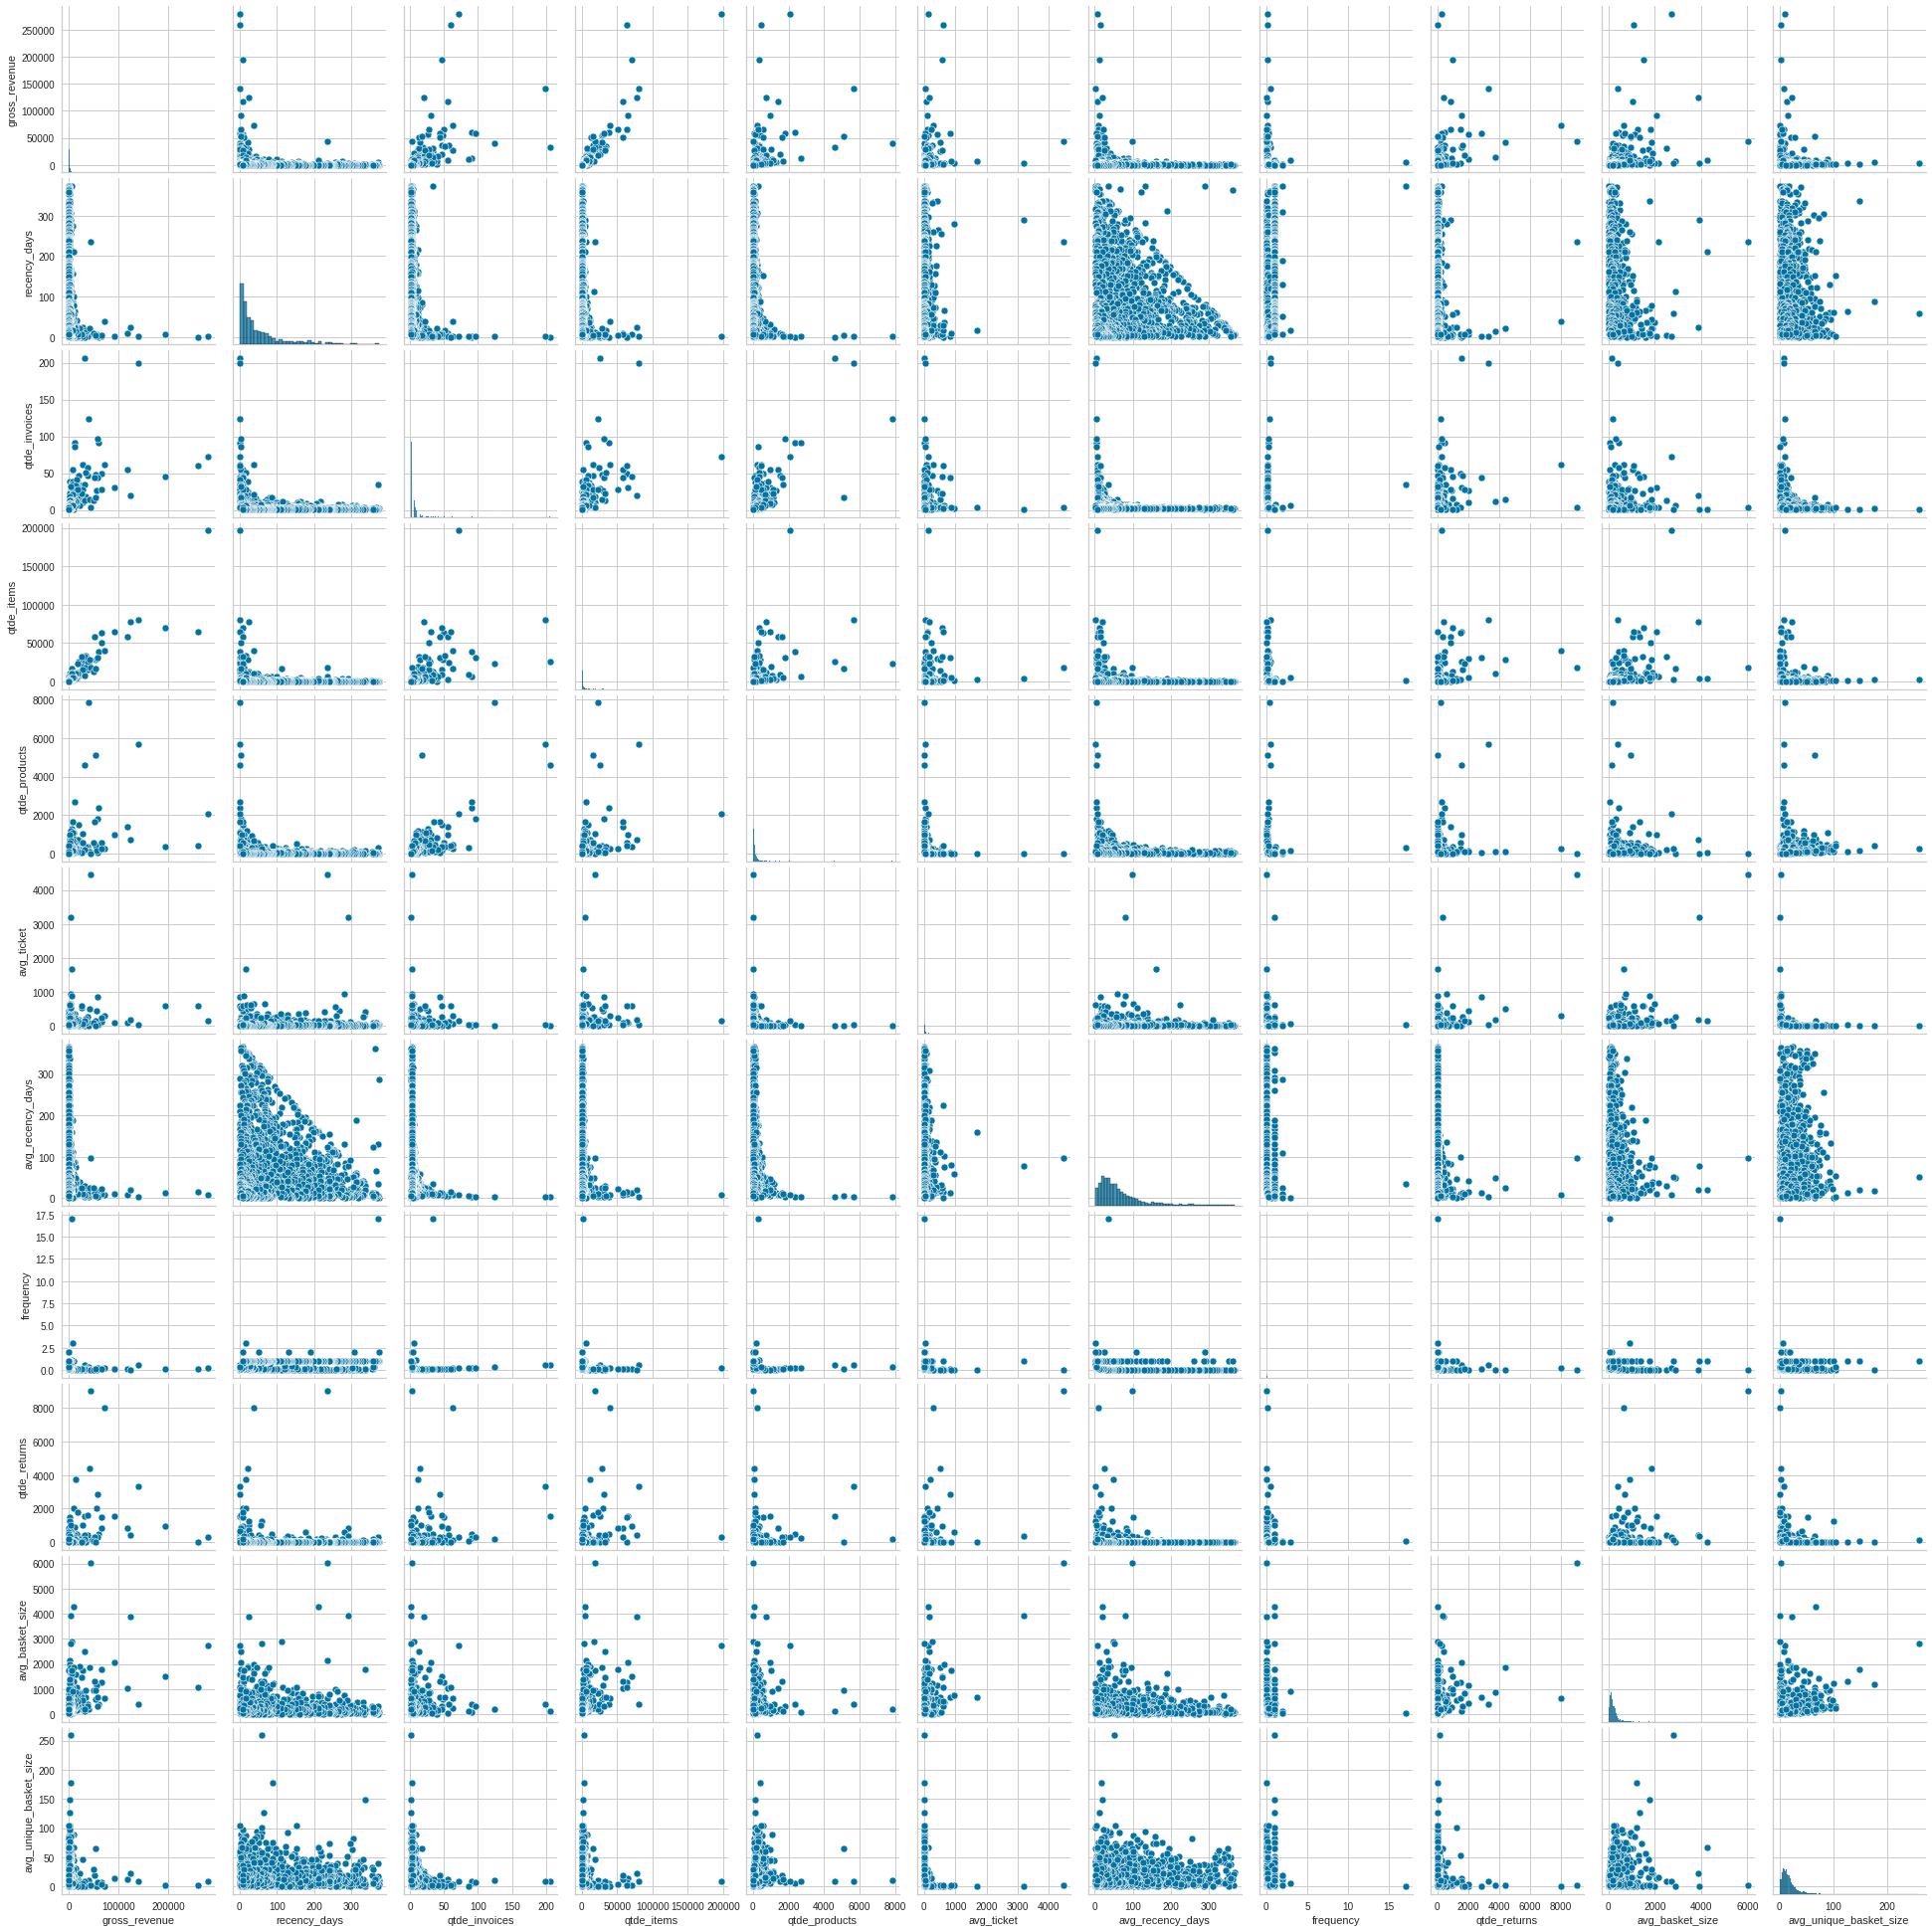

In [51]:
plt.figure( figsize = (25, 12) )
sns.pairplot( df42);

## 4.3. Estudo do Espaço

In [48]:
#original dataset
#df43 =df4.drop(columns=['customer_id'], axis=1).copy()

#selected dataset
cols_select = ['customer_id', 'gross_revenue','recency_days','qtde_products','frequency','qtde_returns']
df43= df4[cols_select].copy()

In [49]:
mm = pp.MinMaxScaler()

df43['gross_revenue']          = mm.fit_transform( df43[['gross_revenue']] )
df43['recency_days']           = mm.fit_transform( df43[['recency_days']] )
#df43['qtde_invoices']          = mm.fit_transform( df43[['qtde_invoices']] )
#df43['qtde_items']             = mm.fit_transform( df43[['qtde_items']] )
df43['qtde_products']          = mm.fit_transform( df43[['qtde_products']] )
#df43['avg_ticket']             = mm.fit_transform( df43[['avg_ticket']] )
#df43['avg_recency_days']       = mm.fit_transform( df43[['avg_recency_days']] )
df43['frequency']              = mm.fit_transform( df43[['frequency']] )
df43['qtde_returns']           = mm.fit_transform( df43[['qtde_returns']] )
#df43['avg_basket_size']        = mm.fit_transform( df43[['avg_basket_size']] )
#df43['avg_unique_basket_size'] = mm.fit_transform( df43[['avg_unique_basket_size']] )

X = df43.copy()

In [50]:
X.head(3)

,customer_id,gross_revenue,recency_days,qtde_products,frequency,qtde_returns
0,17850,0.019292,0.997319,0.037770,1.000000,0.004438
1,13047,0.011559,0.150134,0.021692,0.001345,0.003883
2,12583,0.024000,0.005362,0.029476,0.002052,0.005547


### 4.3.1. PCA

In [51]:
X.shape[1]

6

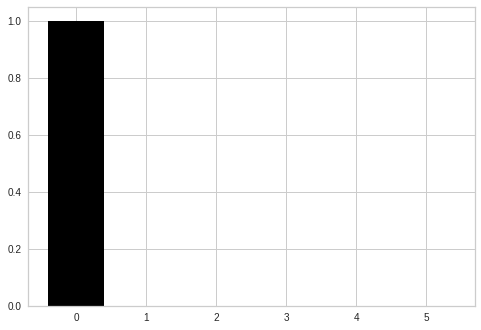

In [52]:
pca = dd.PCA( n_components = X.shape[1])

principal_components = pca.fit_transform( X )

#plot explained variable
features = range( pca.n_components_)

plt.bar(features, pca.explained_variance_ratio_, color = 'black');

# pca component
df_pca = pd.DataFrame( principal_components)

<AxesSubplot:xlabel='0', ylabel='1'>

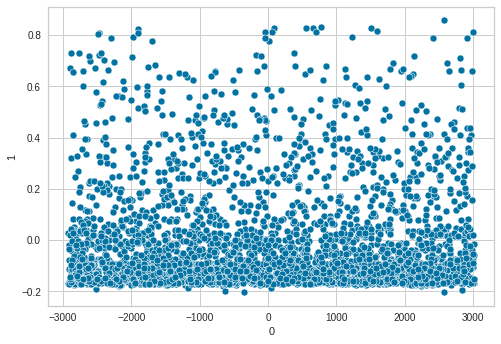

In [53]:
sns.scatterplot(x=0, y= 1, data = df_pca)

> Aqui estamos analizando quais eixos possuem maior variação. 

### 4.3.2. UMAP

<AxesSubplot:xlabel='embedding_x', ylabel='embedding_y'>

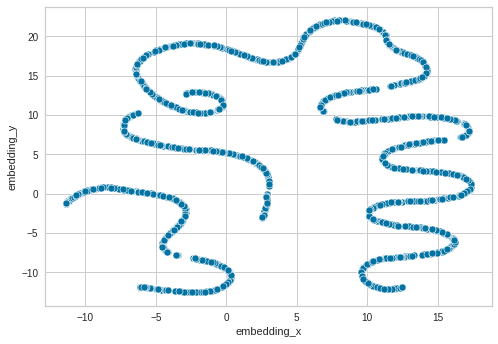

In [54]:
#UMAP

reducer = umap.UMAP( random_state=42 )
embedding = reducer.fit_transform( X )

#embedding
df_pca['embedding_x'] = embedding[:, 0]
df_pca['embedding_y'] = embedding[:, 1]

#plot UMAP
sns.scatterplot( x= 'embedding_x', 
                 y = 'embedding_y',
                 data= df_pca )

### 4.3.3. t-SNE

<AxesSubplot:xlabel='embedding_x', ylabel='embedding_y'>

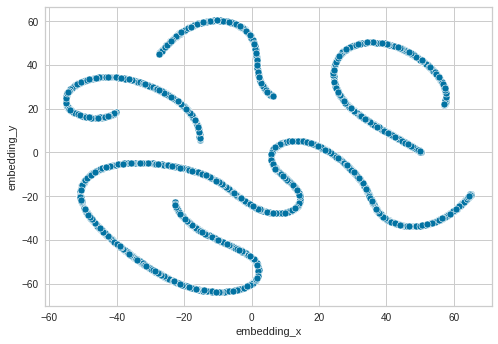

In [55]:
#tsne


reducer = TSNE( n_components = 2, 
                    n_jobs=-1,
                    random_state=42 )
embedding = reducer.fit_transform( X )

#embedding
df_pca['embedding_x'] = embedding[:, 0]
df_pca['embedding_y'] = embedding[:, 1]

#plot UMAP
sns.scatterplot( x= 'embedding_x', 
                 y = 'embedding_y',
                 data= df_pca )

### 4.3.4. Tree-Based Embedding

In [56]:
#Training dataset
X = df43.drop( columns = ['customer_id', 'gross_revenue'], axis = 1)
y = df43['gross_revenue']

#model definition
rf_model = en.RandomForestRegressor( n_estimators = 100, random_state = 42)

#model training
rf_model.fit(X, y)

#leaf

#dataframe leaf

RandomForestRegressor(random_state=42)

In [66]:
df_leaf = pd.DataFrame( rf_model.apply( X ) )

In [67]:
df_leaf.shape

(2968, 100)

<AxesSubplot:xlabel='embedding_x', ylabel='embedding_y'>

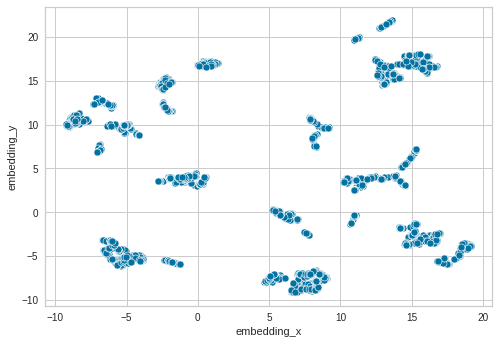

In [68]:
#Reduzer dimensionality
reducer = umap.UMAP( random_state=42 )
embedding = reducer.fit_transform( df_leaf )

#embedding
df_tree = pd.DataFrame()
df_tree['embedding_x'] = embedding[:, 0]
df_tree['embedding_y'] = embedding[:, 1]

#plot UMAP
sns.scatterplot( x= 'embedding_x', 
                 y = 'embedding_y',
                 data= df_tree )

# 5.0. Data Preparation

Padronização ( Standardization ) -> Premissa de que os dados vieram de um distribuição normal.
Rescala      ( Rescale )         -> Não Premissa de que os dados vieram de um distribuição normal.

Dicas de definição de 
1. Distribuição Normal e não possuí Outilier -> Standard Scaler
2. Distribuição Normal e possuí Outlier      -> Robust Scaler - Quartis
3. Distribuição não normal                   -> Min Max scaler



** Testes de Normalidade ** 

QQ Plot    - Quantile Quantile Plot(Quantile teorica X Quantile real )

KS Teste   - Kolgomorov Smirnoff   ( Teste de Hipótese )  Se p-value < 0.5 -> Não distribuição Normal. 

** Detecção Outlier**

Box Plot  -> Pontos são identificados com Outliers

IRQ * 2.5 -> Acima desse valor ( Outlier )

Z-Score > 3 e Z-Score < -3 São Outliers



In [69]:
#df5 =     df4.copy()
df5 = df_tree.copy()

In [70]:
df5.head(2)

,embedding_x,embedding_y
0,14.572662,17.057247
1,8.772554,9.657784


In [225]:
#mm = pp.MinMaxScaler()
#ss = pp.StandardScaler()
#rs = pp.RobustScaler()


#df5['gross_revenue']          = mm.fit_transform( df5[['gross_revenue']] )
#df5['recency_days']           = mm.fit_transform( df5[['recency_days']] )
#df5['qtde_invoices']          = mm.fit_transform( df5[['qtde_invoices']] )
#df5['qtde_items']             = mm.fit_transform( df5[['qtde_items']] )
#df5['qtde_products']          = mm.fit_transform( df5[['qtde_products']] )
#df5['avg_ticket']             = mm.fit_transform( df5[['avg_ticket']] )
#df5['avg_recency_days']       = mm.fit_transform( df5[['avg_recency_days']] )
#df5['frequency']              = mm.fit_transform( df5[['frequency']] )
#df5['qtde_returns']           = mm.fit_transform( df5[['qtde_returns']] )
#df5['avg_basket_size']        = mm.fit_transform( df5[['avg_basket_size']] )
#df5['avg_unique_basket_size'] = mm.fit_transform( df5[['avg_unique_basket_size']] )

#variable = 'avg_ticket'

In [226]:
# Dados AS is
#print( 'Min:{} - Max:{}'.format( df5_aux[variable].min(), df5_aux[variable].max() ) )
#sns.distplot( df5_aux[variable]);

In [227]:
# Dados Normalizados/Rescalados
#print( 'Min:{} - Max:{}'.format( df5[variable].min(), df5[variable].max() ) )
#sns.distplot( df5[variable]);


In [228]:
#sns.boxplot( df5_aux[variable]);

# 6.0. Feature Selection

In [229]:
#cols_select = ['customer_id', 'gross_revenue','recency_days','qtde_products','frequency','qtde_returns']

In [71]:
#df6 = df5[cols_select].copy()
df6 = df_tree.copy()

# 7.0. Hyperparameter Fine-Tunning

In [72]:
#x = df6.drop( columns = ['customer_id'])
x= df_tree.copy()

In [73]:
x.head()

,embedding_x,embedding_y
0,14.572662,17.057247
1,8.772554,9.657784
2,15.082643,17.905268
3,-0.667458,3.525761
4,-8.176351,10.796941


In [74]:
#clusters = [2, 3, 4, 5, 6, 7 ]
clusters = np.arange(2, 25, 1)
clusters

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24])

## 7.1. K-Means 

In [78]:
kmeans_list = []
for k in clusters:
    # Model definition
    Kmeans_model = c.KMeans( n_clusters = k )

    # Model training
    Kmeans_model.fit( x )

    #Model predict
    labels = Kmeans_model.predict( x )

    #model performance
    sil = m.silhouette_score( x, labels, metric = 'euclidean' )
    kmeans_list.append( sil )
    

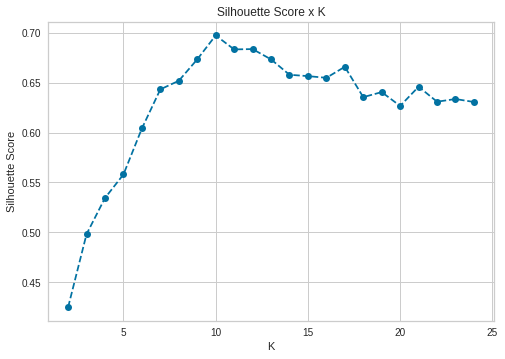

In [79]:
plt.plot( clusters, kmeans_list, linestyle = '--', marker = 'o', color = 'b' );
plt.xlabel('K');
plt.ylabel( 'Silhouette Score' );
plt.title( 'Silhouette Score x K' );


In [80]:
kmeans_list

[0.42504233,
 0.4982563,
 0.53443325,
 0.557996,
 0.6040628,
 0.64324266,
 0.65179336,
 0.6732688,
 0.69724613,
 0.6832385,
 0.68354857,
 0.67325354,
 0.657838,
 0.6564755,
 0.65477955,
 0.6657993,
 0.63541985,
 0.64047223,
 0.6266084,
 0.6458699,
 0.63085437,
 0.6335315,
 0.63056564]

## 7.2. GMM

In [360]:
# AIC = AJUSTE dos dados
# BIC = Ajuste dos parametros

In [81]:
gmm_list = []
for k in clusters:
    # Model definition
    gmm_model = mx.GaussianMixture( n_components = k)

    # Model training
    gmm_model.fit( x )

    #Model predict
    labels = gmm_model.predict( x )

    #model performance
    sil = m.silhouette_score( x, labels, metric = 'euclidean')
    gmm_list.append( sil ) 
    

In [82]:
gmm_list

[0.419123,
 0.45482984,
 0.52528787,
 0.54457206,
 0.60233754,
 0.62408996,
 0.6236721,
 0.64387465,
 0.6487082,
 0.6975325,
 0.67132175,
 0.65447116,
 0.6558243,
 0.6342916,
 0.58010036,
 0.65300393,
 0.662024,
 0.5982525,
 0.6762947,
 0.6026834,
 0.5583408,
 0.62022185,
 0.6097002]

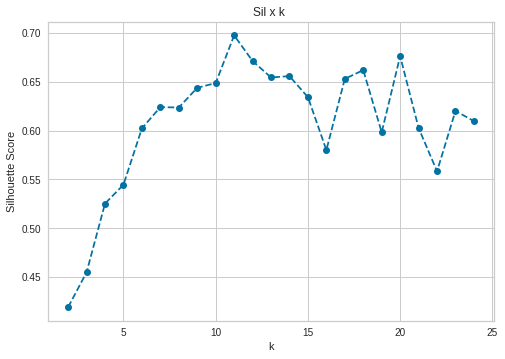

<Figure size 1152x864 with 0 Axes>

In [83]:
plt.plot( clusters, gmm_list, linestyle = '--', marker = 'o', color = 'b' );
plt.xlabel ( 'k' )
plt.ylabel ('Silhouette Score' );
plt.title( 'Sil x k ' );
plt.figure(figsize=(16, 12));

## 7.3. Hierarchical Clustering

In [77]:
#model definition and training
hc_model = linkage( x, 'ward' )

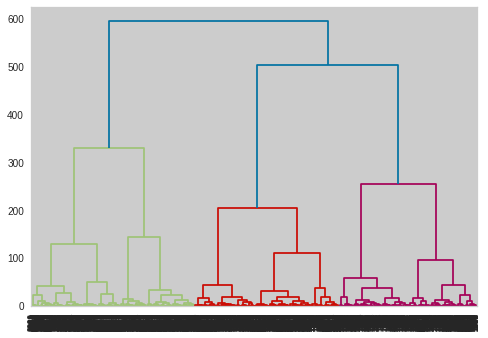

In [78]:
hc.dendrogram( hc_model, leaf_rotation = 90, leaf_font_size = 8)

plt.show()

[]

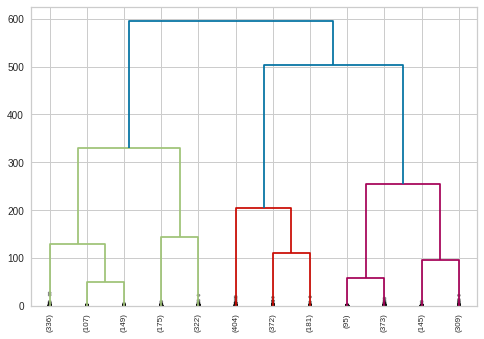

In [79]:
hc.dendrogram( hc_model, 
              truncate_mode = 'lastp',
              p = 12,
              leaf_rotation = 90,
              leaf_font_size = 8,
              show_contracted = True
              )
plt.plot()

### 7.3.1 HClustering Silhouette Score

In [80]:
hc_list = []
for k in clusters :
    # model definition & training
    hc_model = hc.linkage( x, 'ward' )

    #model predict
    labels = hc.fcluster( hc_model, k, criterion = 'maxclust' )

    #metrics
    sil = m.silhouette_score( x, labels, metric = 'euclidean')
    hc_list.append(sil)

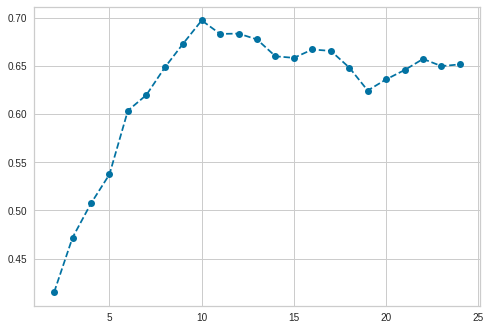

In [81]:
plt.plot( clusters, hc_list, linestyle='--', marker = 'o', color='b')

## 7.4. DBSCAN

In [82]:
x.shape

(2968, 2)

In [83]:
labels.shape

(2968,)

In [84]:
eps = 2.00
min_samples = 20

#model definition
dbscan_model = c.DBSCAN( eps = eps, min_samples = min_samples )

#mode training & predict
labels = dbscan_model.fit_predict( x )

sil = m.silhouette_score( x, labels, metric = 'euclidean')
sil

0.644681

In [85]:
np.unique(labels)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13])

In [86]:
neighbors = NearestNeighbors( n_neighbors = min_samples  ).fit(X)
distances, indices = neighbors.kneighbors( X )

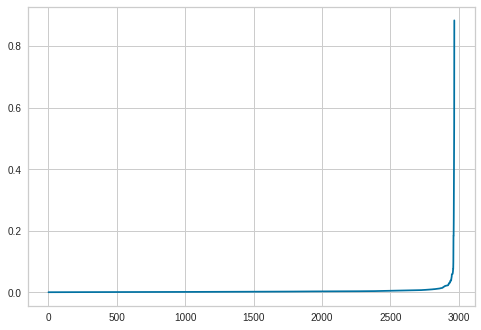

In [87]:
distances = np.sort( distances, axis = 0)
distances = distances[:,1]
plt.plot( distances );

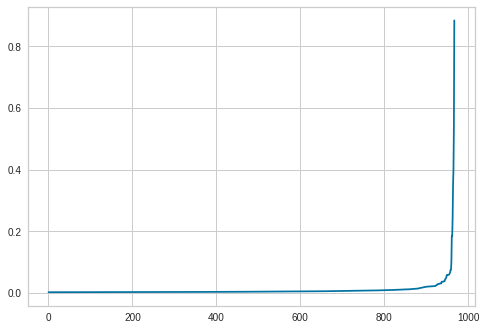

In [88]:
plt.plot( distances[2000:] );

In [89]:
dbscan_list = [0.644681, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000]

## 7.5 Results

### Todas features

In [263]:
# Model Name / k =2 / k = 3 / k = 4 / k = 5 / ...
# Kneabs         ss     ss      ss     ss
# GMM            ss     ss      ss     ss     
# HC             ss     ss      ss     ss
# DBSCAN         ss     ss      ss     ss

df_results = pd.DataFrame({'KMeans': kmeans_list,
                           'GMM': gmm_list, 
                           'HC': hc_list, 
                           'DBSCAN': dbscan_list}).T
df_results.columns = clusters
df_results.style.highlight_max( color = 'lightgreen', axis = 1 )

,2,3,4,5,6,7
KMeans,0.507904,0.519431,0.392230,0.356885,0.328004,0.341608
GMM,0.175173,0.012877,0.002052,-0.048131,-0.087343,-0.107721
HC,0.468911,0.498824,0.327713,0.316046,0.328641,0.325372
DBSCAN,0.615132,0.000000,0.000000,0.000000,0.000000,0.000000


### Features selecionadas

In [286]:
#Com nova seleção de features:
df_results = pd.DataFrame({'KMeans': kmeans_list,
                           'GMM': gmm_list, 
                           'HC': hc_list, 
                           'DBSCAN': dbscan_list}).T
df_results.columns = clusters
df_results.style.highlight_max( color = 'lightgreen', axis = 1 )

,2,3,4,5,6,7
KMeans,0.722958,0.592730,0.563871,0.578537,0.552414,0.539901
GMM,0.042310,-0.016524,0.173423,-0.113265,-0.162640,-0.189758
HC,0.721382,0.570514,0.562887,0.496029,0.515360,0.515740
DBSCAN,0.615132,0.000000,0.000000,0.000000,0.000000,0.000000


### Embed da arvore

In [90]:
#Usadno embed da arvore:
df_results = pd.DataFrame({'KMeans': kmeans_list,
                           'GMM': gmm_list, 
                           'HC': hc_list 
                           }).T
df_results.columns = clusters
df_results.style.highlight_max( color = 'lightgreen', axis = 1 )

,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
KMeans,0.425042,0.498256,0.534433,0.557996,0.602338,0.626624,0.651793,0.673269,0.697246,0.683239,0.663268,0.663579,0.659010,0.658913,0.654840,0.665799,0.633342,0.624686,0.612982,0.645870,0.641173,0.639427,0.639134
GMM,0.419123,0.498053,0.533926,0.538098,0.604913,0.625456,0.630217,0.643875,0.671656,0.697532,0.647996,0.583049,0.640962,0.670206,0.600464,0.593443,0.600344,0.613069,0.610444,0.644516,0.629881,0.636221,0.600336
HC,0.415129,0.471872,0.507311,0.537425,0.603638,0.619795,0.648404,0.673269,0.697246,0.683239,0.683549,0.677495,0.660009,0.658366,0.667072,0.665589,0.648326,0.624476,0.636052,0.645721,0.657253,0.649790,0.651623


### Features selecionadas e Embed da arvore

In [91]:
#Usadno embed da arvore:
df_results = pd.DataFrame({'KMeans': kmeans_list,
                           'GMM': gmm_list, 
                           'HC': hc_list 
                           }).T
df_results.columns = clusters
df_results.style.highlight_max( color = 'lightgreen', axis = 1 )

,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
KMeans,0.425042,0.498256,0.534433,0.557996,0.602338,0.626624,0.651793,0.673269,0.697246,0.683239,0.663268,0.663579,0.659010,0.658913,0.654840,0.665799,0.633342,0.624686,0.612982,0.645870,0.641173,0.639427,0.639134
GMM,0.419123,0.498053,0.533926,0.538098,0.604913,0.625456,0.630217,0.643875,0.671656,0.697532,0.647996,0.583049,0.640962,0.670206,0.600464,0.593443,0.600344,0.613069,0.610444,0.644516,0.629881,0.636221,0.600336
HC,0.415129,0.471872,0.507311,0.537425,0.603638,0.619795,0.648404,0.673269,0.697246,0.683239,0.683549,0.677495,0.660009,0.658366,0.667072,0.665589,0.648326,0.624476,0.636052,0.645721,0.657253,0.649790,0.651623


## 7.1 Silhouette Analysis

 For K = 2. Silhouette Score: 0.41512924432754517
 For K = 3. Silhouette Score: 0.4718724489212036
 For K = 4. Silhouette Score: 0.5073108077049255
 For K = 5. Silhouette Score: 0.5374246835708618
 For K = 6. Silhouette Score: 0.6036380529403687
 For K = 7. Silhouette Score: 0.6197946667671204


IndexError: index 3 is out of bounds for axis 0 with size 3

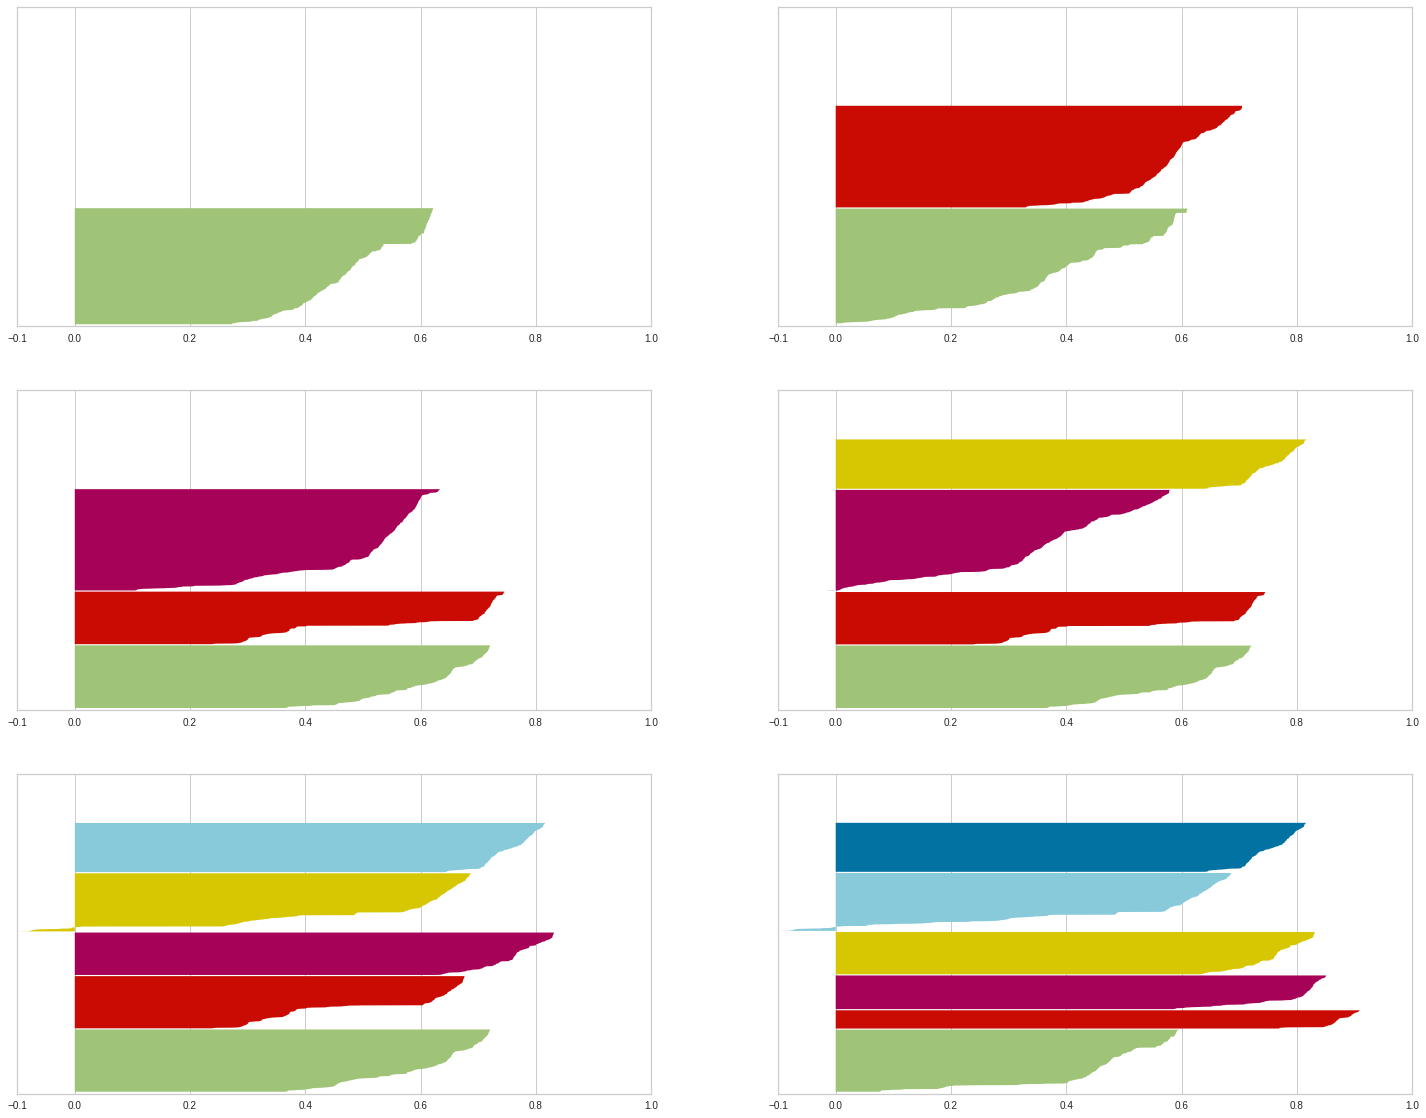

In [95]:
fig, ax = plt.subplots( 3, 2 )
fig.set_size_inches( 25, 20 )

for k in clusters:
    q, mod = divmod( k, 2 )
    
    ax[q-1, mod].set_xlim( [ -0.1, 1] )
    ax[q-1, mod].set_ylim( [ 0, len( x ) + ( k+1 )*10] )
    
    # model definition & training
    hc_model = hc.linkage( x, 'ward' )

    # model predict
    labels = hc.fcluster( hc_model, k, criterion='maxclust' )

    # performance
    ss = m.silhouette_score( x, labels, metric='euclidean' )
    print( ' For K = {}. Silhouette Score: {}'.format( k, ss ) )

    samples_silhouette_values = m.silhouette_samples( x, labels )

    y_lower = 10
    for i in range( k ):

        # select clusters
        ith_samples_silhouette_values = samples_silhouette_values[ labels == i]
        
        # sort values
        ith_samples_silhouette_values.sort()

        # size clusters
        size_cluster_i = ith_samples_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        cmap = plt.cm.get_cmap( 'Spectral' )
        color = cmap( i / k )

        ax[q-1, mod].fill_betweenx( np.arange( y_lower, y_upper ), 0, ith_samples_silhouette_values  )
        
        y_lower = y_upper + 10
        
    ax[q-1, mod].set_yticks([])
    ax[q-1, mod].set_xticks( [-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

In [219]:
ith_samples_silhouette_values

array([0.06713123, 0.59898516, 0.61608206, 0.6182482 , 0.66125243,
       0.72881037, 0.73311833, 0.73700838, 0.74278837])

# 8.0. Model Training

## 8.1 K-Means

#### Model Definition

In [98]:
# model Kmeans
k= 8
kmeans = c.KMeans( init = 'random', n_clusters=k, n_init=10, max_iter=300 )

#model training
kmeans.fit( x )

##clustering
labels = kmeans.labels_



In [137]:
# Model GMM
k=8
kmeans = mx.GaussianMixture( n_components = k)

# Model training
kmeans.fit( x )

#Model predict
labels = kmeans.predict( x )

In [99]:
labels

array([2, 0, 2, ..., 2, 0, 5], dtype=int32)

#### Cluster Validation

In [100]:
## wss( within-cluster sum of square )
print( 'wss values: {}'.format( kmeans.inertia_ ))

## SS( Silhouette Score)
print('SS Values:{}'.format( m.silhouette_score( x, labels, metric='euclidean')))

wss values: 22332.552734375
SS Values:0.651793360710144


# 9. Cluster Analysis

In [101]:
df9 = x.copy()
df9['cluster'] = labels


In [102]:
df92 = df4.copy()
df92['cluster'] = labels
df92.head()

,customer_id,gross_revenue,recency_days,qtde_invoices,qtde_items,qtde_products,avg_ticket,avg_recency_days,frequency,qtde_returns,avg_basket_size,avg_unique_basket_size,cluster
0,17850,5391.21,372.0,34.0,1733.0,297.0,18.152222,35.500000,17.000000,40.0,50.970588,0.617647,2
1,13047,3232.59,56.0,9.0,1390.0,171.0,18.904035,27.250000,0.028302,35.0,154.444444,11.666667,0
2,12583,6705.38,2.0,15.0,5028.0,232.0,28.902500,23.187500,0.040323,50.0,335.200000,7.600000,2
3,13748,948.25,95.0,5.0,439.0,28.0,33.866071,92.666667,0.017921,0.0,87.800000,4.800000,5
4,15100,876.00,333.0,3.0,80.0,3.0,292.000000,8.600000,0.073171,22.0,26.666667,0.333333,4


## 9.1. Visualizatoin Inspection

<AxesSubplot:xlabel='embedding_x', ylabel='embedding_y'>

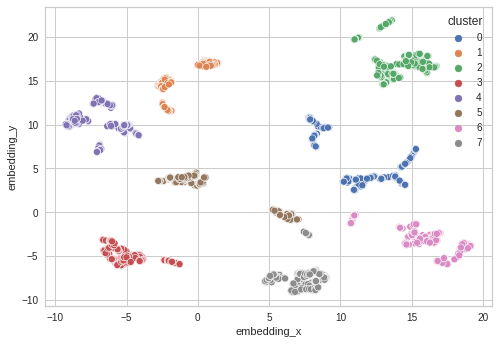

In [103]:
sns.scatterplot( x = 'embedding_x', y = 'embedding_y', hue = 'cluster', data = df9, palette = 'deep')

In [383]:
#fig = px.scatter_3d( df8, x= 'recency_days', y = 'invoice_no', z='gross_revenue', color= 'cluster' );
#fig.show()
#visualizer = SilhouetteVisualizer( kmeans, colors = 'yellowbrick')
#visualizer.fit(X)
#visualizer.finalize();

## 9.2. 2d plot

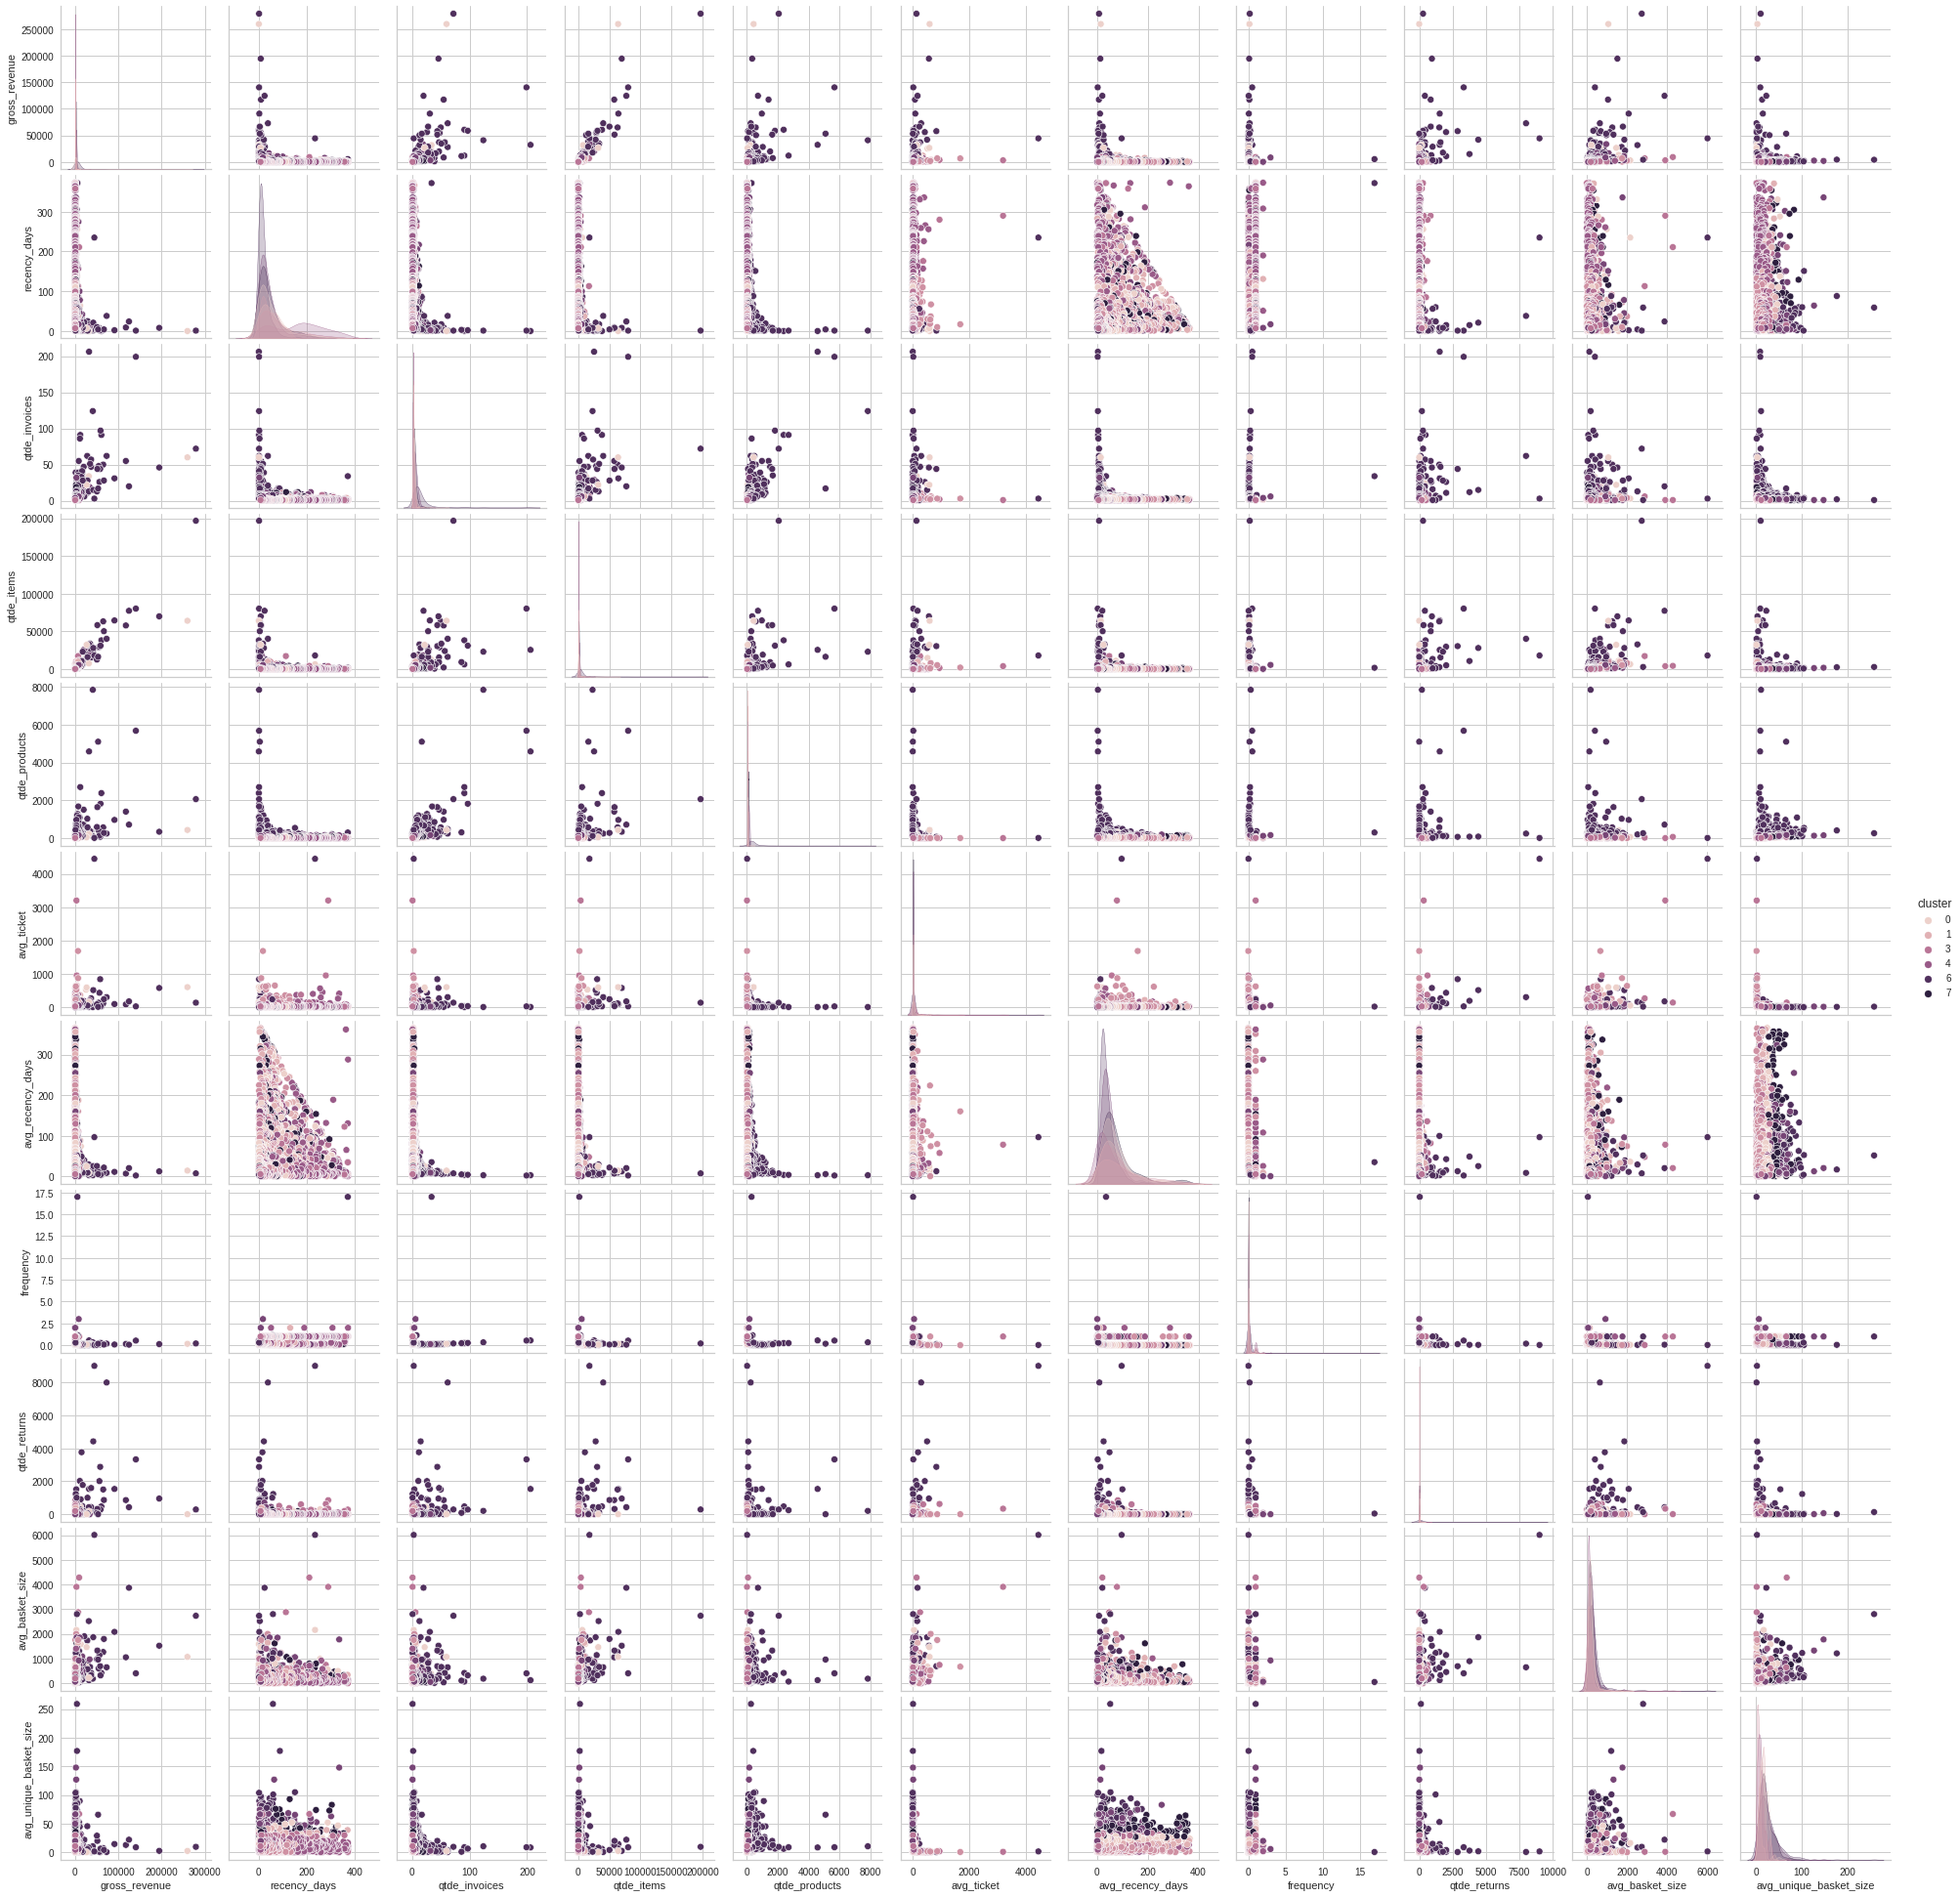

In [81]:
# 2d plot
df_viz = df92.drop( columns = 'customer_id', axis = 1 )
sns.pairplot( df_viz, hue = 'cluster' )

## 9.3. UMAP

<AxesSubplot:xlabel='embedding_x', ylabel='embedding_y'>

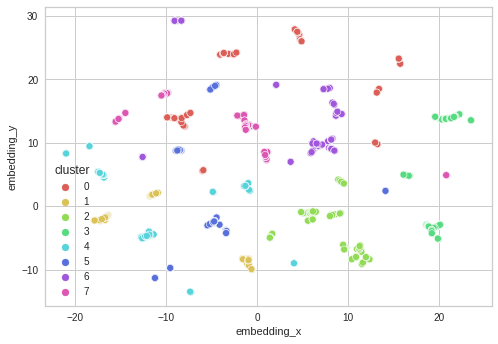

In [104]:
#UMAP
df_viz = df92.drop( columns = 'customer_id', axis = 1 )
reducer = umap.UMAP( n_neighbors = 90, random_state=42 )
embedding = reducer.fit_transform( x )

#embedding
df_viz['embedding_x'] = embedding[:, 0]
df_viz['embedding_y'] = embedding[:, 1]

#plot UMAP
sns.scatterplot( x= 'embedding_x', y = 'embedding_y',
              hue = 'cluster', 
              palette = sns.color_palette( 'hls', n_colors = len(df_viz['cluster'].unique() )),
              data= df_viz )
                

> O UMAP projeta uma visualização de mais alta dimensionalidade. Assim conseguimos analisar o quão misturados estão os clusters. 

> Os pontos próximos são classificados com a mesma cor, da para ver uma clara dominação do cluster 3(roxo), um dos motivos pode ser de não ter sido feito uma reescala dos cluster ainda. 

> Alterando o parâmetro n_neighbors, é possível visualizar estruturas mais globais, quando diminui, ele mostra visualização com menos agrupação, pois diminui a quantidade de visinhos. 

## 9.4. Cluster Profile

In [105]:
df92 = df4[ cols_select ].copy()
df92['cluster'] = labels
df92.head()

,customer_id,gross_revenue,recency_days,qtde_products,frequency,qtde_returns,cluster
0,17850,5391.21,372.0,297.0,17.000000,40.0,2
1,13047,3232.59,56.0,171.0,0.028302,35.0,0
2,12583,6705.38,2.0,232.0,0.040323,50.0,2
3,13748,948.25,95.0,28.0,0.017921,0.0,5
4,15100,876.00,333.0,3.0,0.073171,22.0,4


In [106]:
# Number of customer
df_cluster = df92[['customer_id', 'cluster']].groupby( 'cluster' ).count().reset_index()
df_cluster['perc_customer'] = 100*( df_cluster['customer_id'] / df_cluster[ 'customer_id' ].sum() )

# Avg Gross revenue
df_avg_gross_revenue = df92[['gross_revenue', 'cluster']].groupby( 'cluster' ).mean().reset_index()
df_cluster = pd.merge ( df_cluster, df_avg_gross_revenue, how = 'inner', on = 'cluster')

#Avg recency days
df_avg_recency_days = df92[['recency_days', 'cluster']].groupby ( 'cluster' ).mean().reset_index()
df_cluster = pd.merge( df_cluster, df_avg_recency_days, how = 'inner', on='cluster' )

#Avg qtde_products
df_qtde_products = df92[['qtde_products', 'cluster']].groupby ( 'cluster' ).mean().reset_index()
df_cluster = pd.merge( df_cluster, df_qtde_products, how = 'inner', on='cluster' )

# Frequency
df_frequency = df92[['frequency', 'cluster']].groupby( 'cluster' ).mean().reset_index()
df_cluster = pd.merge(df_cluster, df_frequency, how='inner', on='cluster' )

#returns
df_returns = df92[['qtde_returns', 'cluster']].groupby( 'cluster' ).mean().reset_index()
df_cluster = pd.merge(df_cluster, df_returns, how='inner', on='cluster' )

#AVG TIcket
#df_ticket = df9[['avg_ticket', 'cluster']].groupby( 'cluster' ).mean().reset_index()
#df_cluster = pd.merge(df_cluster, df_ticket, how='inner', on='cluster' )

df_cluster.sort_values('gross_revenue', ascending = False)


,cluster,customer_id,perc_customer,gross_revenue,recency_days,qtde_products,frequency,qtde_returns
2,2,468,15.768194,8836.136389,21.438034,424.134615,0.094571,149.271368
0,0,454,15.296496,2740.037775,43.066079,143.013216,0.050932,23.055066
7,7,399,13.443396,2308.967870,57.135338,66.714286,0.044242,12.521303
6,6,451,15.195418,1670.489623,51.226164,93.177384,0.046375,10.392461
5,5,282,9.501348,1063.131525,81.907801,42.021277,0.125759,26.783688
3,3,322,10.849057,971.025435,75.329193,37.462733,0.074586,6.571429
1,1,256,8.625337,582.070391,48.628906,11.285156,0.196492,1.511719
4,4,336,11.320755,532.209464,165.422619,16.363095,0.363458,10.369048


In [ ]:
#2 Cluster -> Insiders
#0 Cluster -> More Products
#7 Cluster -> Spend Money
#6 Cluster -> Even More Products
#5 Cluster -> Less Days
#3 Cluster -> Less 1k
#1 Cluster -> Stop Returners
#4 Cluster -> More Buy

# 10.0. Análise Exploratória de Dados

In [107]:
df10 = df_cluster.copy()

## 10.1. MindMap de hipoteses

1. Fenomeno
2. Entidades( Customer, Local, Finance, Family )
3. Características de entidade( Customer = Nome, idade, salário, escolaridade )

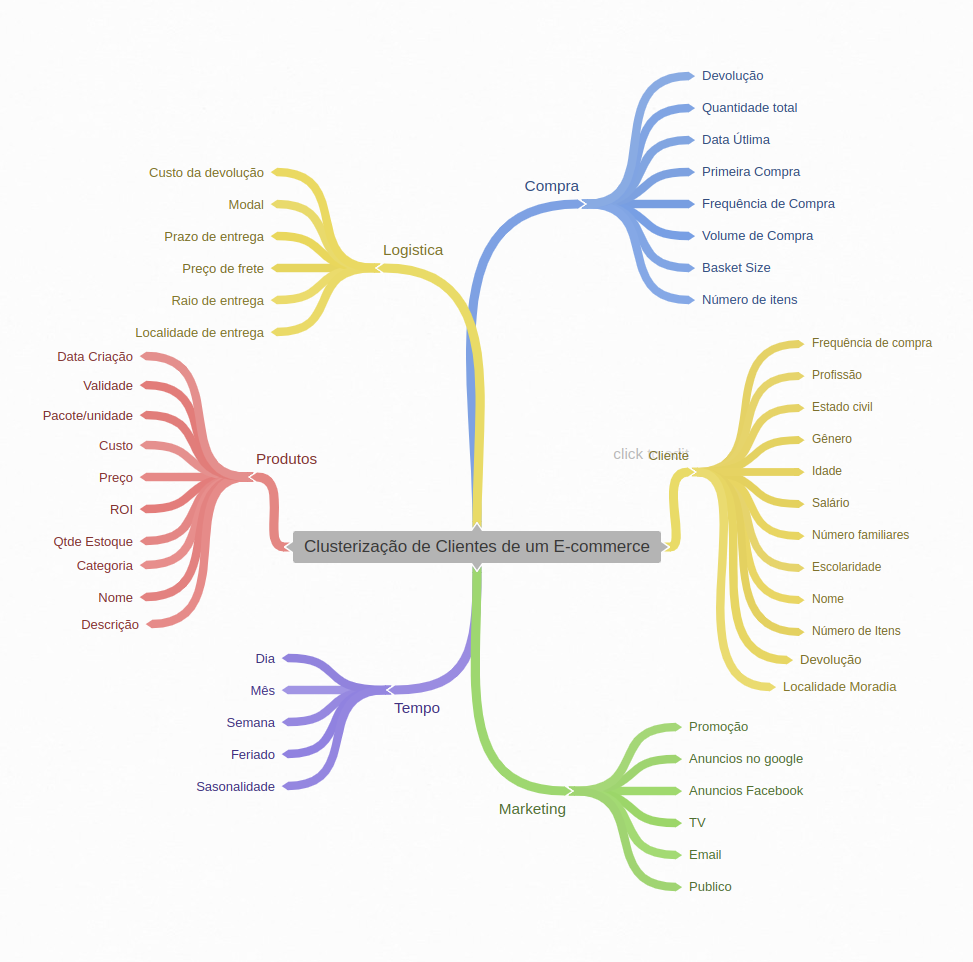

In [86]:
Image.open('data/hipoteses_map.png')

## 10.2. Hipoteses de Negócio

In [109]:
df10

,cluster,customer_id,perc_customer,gross_revenue,recency_days,qtde_products,frequency,qtde_returns
0,0,454,15.296496,2740.037775,43.066079,143.013216,0.050932,23.055066
1,1,256,8.625337,582.070391,48.628906,11.285156,0.196492,1.511719
2,2,468,15.768194,8836.136389,21.438034,424.134615,0.094571,149.271368
3,3,322,10.849057,971.025435,75.329193,37.462733,0.074586,6.571429
4,4,336,11.320755,532.209464,165.422619,16.363095,0.363458,10.369048
5,5,282,9.501348,1063.131525,81.907801,42.021277,0.125759,26.783688
6,6,451,15.195418,1670.489623,51.226164,93.177384,0.046375,10.392461
7,7,399,13.443396,2308.967870,57.135338,66.714286,0.044242,12.521303


1. Afirmação
2. Comparação entr variáveis. 
3. Valor base de comparação.  

### Hipóteses de Compra

1. Afirmação | Cluster | tendo base ( chute )

1. Os clientes do cluster insiders usam cartão de crédito em 80% das compras. 
2. Os clientes do cluster insiders possuem um ticket médio de 10% acima do clsuter More Products
3. Os clientes do cluster insiders possuem um basket size acima de 5 produtos. 
4. **Os clientes do cluster insiders possuem um volume (produtos) de compras acima de 10% do total de compras.
5. **Os clientes do cluster insiders possuem um volume (faturamento) de compras acima de 10% do total de compras.
6. **Os clientes do cluster insiders tem um número de devolução abaixo da média da base total de clientes. 

#### H1. Os clientes do cluster insiders possuem um volume (produtos) de compras acima de 10% do total de compras.

In [112]:
#df10[['cluster','qtde_products']].groupby( 'cluster' ).sum().reset_index()

#soma da qtde de produtos do insiders
df_sales_insiders = df10.loc[df10['cluster'] == 2, 'qtde_products'].sum()
df10['qtde_products'].sum()

# soma da qtde de produtos total

#df10[][]''qtde_produtcs

834.1717615530442

#### H2. Os clientes do cluster insiders possuem um volume (faturamento) de compras acima de 10% do total de compras.


#### H3. Os clientes do cluster insiders tem um número de devolução abaixo da média da base total de clientes. 

### Hipóteses de Cliente

1. 60% dos clientes do cluster insiders possuem o estado civil de solteiro. 
2. 10% dos clientes do cluster insiders estão na faixa de 24-35 anos. 
3. 40% das localidades de entrega do cluster insiders estão dentro de um raio de 50km.
4. 5% dos clientes do cluster insiders recebem mais de 100 mil dólares anualmente. 
5. 90% dos clientes do cluster insiders tem ensino superior completo. 


### Hipóteses de Produto

1. 30% de todos os produtos em pacotes grandes são comprados pelos clientes do cluster insiders. 
2. A mediana dos preços dos produtos comprados pelos clientes do cluster insiders é 10% maior que a mediana de todos os preços dos produtos. 
3. O percentil do preço dos produtos comprados pelos clientes insiders. 
4. O peso médio dos produtos comprados pelos clientes do cluster insiders é maior do que o peso médio dos outros clusters. 
5. A idade média dos produtso comprados pelso clientes do cluster insiders é menor do que 15 dias. 

## 10.3. Priorização das Hipóteses

## 10.4. Validação das Hipóteses

## 10.5. Quadro de Respostas

# 11.0. Deplou to Production